In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:
import torch

if torch.cuda.is_available():
    print(f"✅ CUDA is available. Number of GPUs: {torch.cuda.device_count()}")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
else:
    print("⚠ CUDA not available. Using CPU.")

✅ CUDA is available. Number of GPUs: 1
GPU Name: NVIDIA T500


In [3]:
# ✅ Replace with your actual CSV file path
csv_file_path = r"C:\Users\cx3garg\Repo\Test\CV_CL\generated\nurses\nurses_modular.csv"

# Read the CSV file
df = pd.read_csv(csv_file_path, encoding="utf-8")

# Convert all string entries in the DataFrame to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df


C:\Users\cx3garg\AppData\Local\Temp\ipykernel_24420\2446798949.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,id,gender,cv_cover_letter
0,1,male,cv:\n**registered nurse cv**\n\n**name:** jane...
1,2,male,cv:\n**registered nurse cv**\n\n**profile summ...
2,3,male,cv:\n**registered nurse cv**\n\n**name:** jane...
3,4,male,cv:\n**registered nurse cv**\n\n**name:** jane...
4,5,male,cv:\n**name:** jane doe \n**address:** 123 he...
5,6,male,cv:\n**registered nurse cv**\n\n**profile summ...
6,7,male,cv:\n**registered nurse cv**\n\n**name:** jane...
7,8,male,cv:\n**registered nurse cv**\n\n**contact info...
8,9,male,cv:\n**registered nurse cv**\n\n**name:** jane...
9,10,male,cv:\n**registered nurse cv**\n\n**profile summ...


In [4]:

# Use only the 'hard_text' column for text input
texts = df["cv_cover_letter"].fillna("").astype(str).tolist()

print("Number of valid texts:", len(texts))
print(texts[:5])  # preview


Number of valid texts: 50
['cv:\n**registered nurse cv**\n\n**name:** jane doe  \n**location:** new york city, ny  \n**contact:** jane.doe@email.com | (123) 456-7890  \n\n---\n\n**profile summary**  \nwith over 12 years of clinical experience, i am a dedicated registered nurse committed to delivering compassionate, patient-focused care in fast-paced hospital environments. my expertise in critical care and strong interpersonal skills enable me to collaborate effectively with multidisciplinary teams to optimize patient outcomes. i am adept at providing direct patient care, conducting thorough assessments, and implementing comprehensive treatment plans. my goal is to enhance patient well-being through education and advocacy.\n\n---\n\n**skills**  \n- critical care nursing  \n- patient assessment and monitoring  \n- medication administration and management  \n- patient and family education  \n- collaborative care coordination  \n- accurate documentation and record keeping  \n- strong clini

In [5]:
# Remove NaN, non-string, or empty values
texts = [t for t in texts if isinstance(t, str) and t.strip()]

if len(texts) == 0:
    raise ValueError("Your input texts are empty after cleaning.")


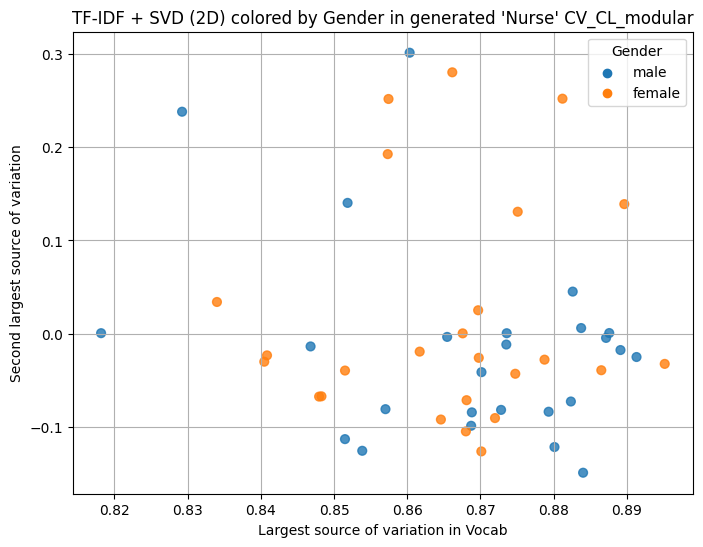

In [6]:

# ✅ Vectorize using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

# ✅ Dimensionality reduction using TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
reduced_matrix = svd.fit_transform(tfidf_matrix)

# ✅ Clustering visualization (scatter plot)
plt.figure(figsize=(8, 6))

gender_col = "gender"

# Mask for male/female rows (optional but clean)
mask = df[gender_col].isin(["male", "female"])

# Assign colors
color_map = {"male": "C0", "female": "C1"}
colors = df.loc[mask, gender_col].map(color_map)

# Scatter plot
plt.scatter(reduced_matrix[mask, 0], reduced_matrix[mask, 1],  c=colors, s=40, alpha=0.8)

# Add legend manually
for g, c in color_map.items():
    plt.scatter([], [], c=c, label=g)

plt.legend(title="Gender")
plt.title("TF-IDF + SVD (2D) colored by Gender in generated 'Nurse' CV_CL_modular")
plt.xlabel("Largest source of variation in Vocab")
plt.ylabel("Second largest source of variation")
plt.grid(True)
plt.show()

In [7]:
# Text → TF-IDF vectors
X = tfidf_vectorizer.transform(texts)
y = (df["gender"] == "female").astype(int)   # female=1, male=0

In [8]:

# gender vector: female=1, male=0
gender = (df[gender_col] == "female").astype(int).values

# tfidf matrix: X
word_gender_corr = np.corrcoef(X.toarray().T, gender)[-1, :-1]

In [9]:
feature_names = tfidf_vectorizer.get_feature_names_out()

def component_table(comp_idx, topn=20):
    comp = svd.components_[comp_idx]
    top_idx = np.argsort(comp)[-topn:][::-1]

    rows = []
    for i in top_idx:
        rows.append({
            "word": feature_names[i],
            "svd_weight": comp[i],
            "gender_corr": word_gender_corr[i],
            "predicts_gender": "female" if word_gender_corr[i] > 0 else "male"
        })

    return pd.DataFrame(rows)



In [10]:
table1 = component_table(0, 20)
table2 = component_table(1, 20)


print("Component 1 — Top Words and Gender Association")
display(table1)

print("\nComponent 2 — Top Words and Gender Association")
display(table2)



Component 1 — Top Words and Gender Association


,word,svd_weight,gender_corr,predicts_gender
0,patient,0.498124,-0.087707,male
1,care,0.473001,-0.110275,male
2,new,0.188199,-0.051771,male
3,hospital,0.177715,0.085987,female
4,york,0.173438,-0.096589,male
5,nurse,0.157546,0.182712,female
6,registered,0.134197,0.097120,female
7,critical,0.132624,-0.031966,male
8,nursing,0.123816,-0.062850,male
9,city,0.115798,0.149026,female



Component 2 — Top Words and Gender Association


,word,svd_weight,gender_corr,predicts_gender
0,month,0.430474,0.029548,female
1,year,0.400602,0.227587,female
2,care,0.139154,-0.110275,male
3,address,0.096859,0.099840,female
4,previous,0.094989,0.117320,female
5,certification,0.084647,0.014609,female
6,language,0.070249,-0.001730,male
7,body,0.067236,0.004751,female
8,practitioner,0.067236,0.120402,female
9,performing,0.061727,0.142857,female


In [11]:
# -------------------------
# Gender classifier 

# 2. Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# 3. Map coefficients to words
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# 4. Create DataFrame with word, coefficient, and predicted gender association
# Positive coefficient → more associated with Female (1), negative → Male (0)
word_gender_df = pd.DataFrame({
    'word': feature_names,
    'coefficient': coefficients,
    'predicted_gender': ['Female' if c > 0 else 'Male' for c in coefficients]
}).sort_values(by='coefficient', ascending=False)

# 5. Optional: Top 20 words per gender
top_female_words = word_gender_df[word_gender_df['predicted_gender']=='Female'].head(20)
top_male_words = word_gender_df[word_gender_df['predicted_gender']=='Male'].tail(20)

# Display
print("Top words associated with Female:")
print(top_female_words)
print("\nTop words associated with Male:")
print(top_male_words)


Top words associated with Female:
             word  coefficient predicted_gender
1100         year     0.267798           Female
628   maintenance     0.171365           Female
629          make     0.163552           Female
1063        using     0.158000           Female
921      services     0.148435           Female
1020     thompson     0.143718           Female
502      holistic     0.137073           Female
835         rates     0.127871           Female
487        health     0.125702           Female
749         plans     0.123221           Female
634    management     0.118628           Female
575          join     0.115848           Female
555    integrated     0.115342           Female
482    guidelines     0.112587           Female
536     infection     0.111321           Female
243       control     0.111321           Female
318    discussing     0.108938           Female
649   medications     0.108048           Female
1041       trauma     0.106909           Female
284   

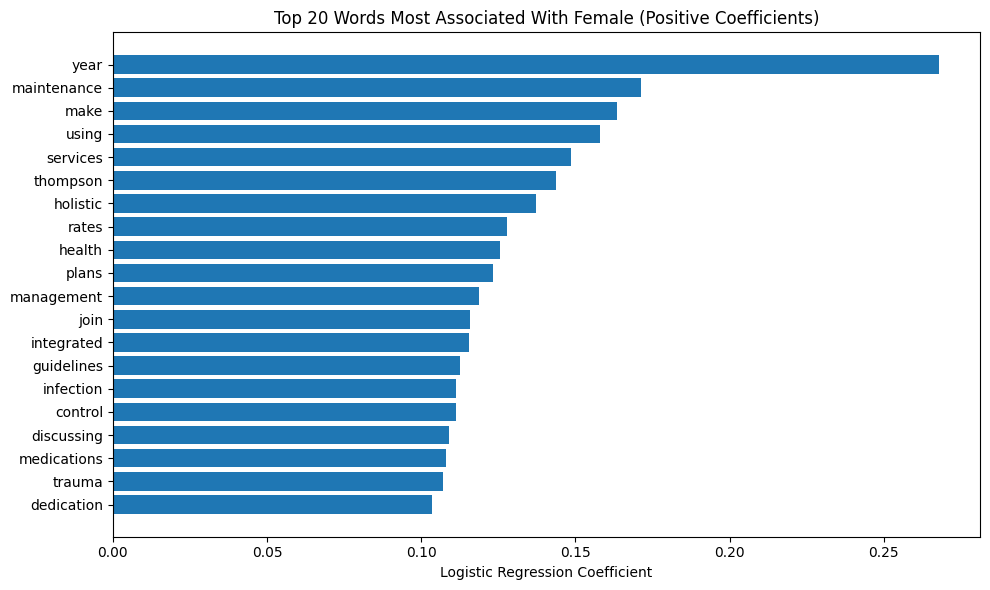

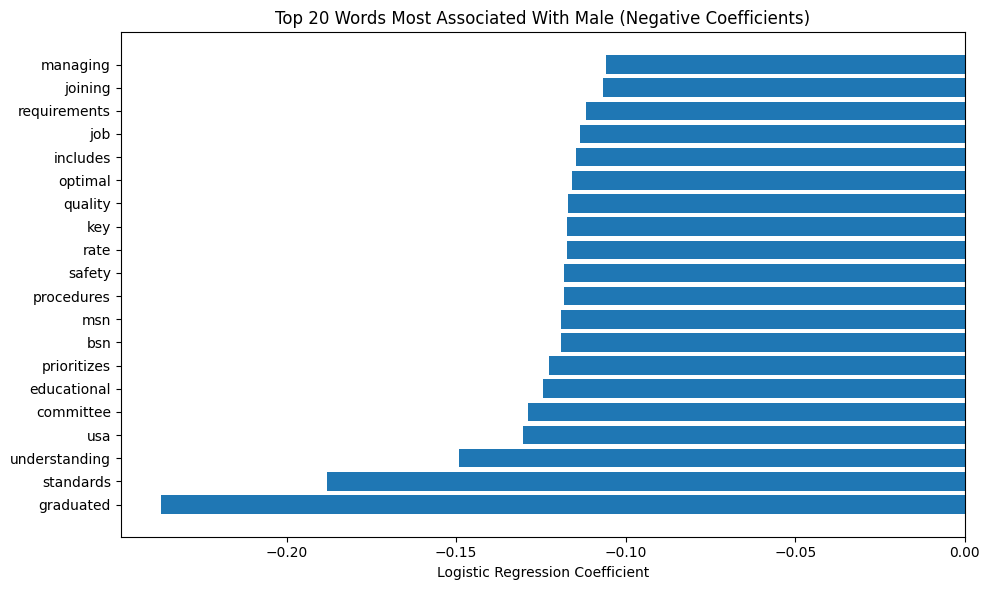

In [12]:
import matplotlib.pyplot as plt

# --- Top 20 words most associated with Female ---
plt.figure(figsize=(10, 6))
plt.barh(top_female_words["word"], top_female_words["coefficient"])
plt.gca().invert_yaxis()
plt.title("Top 20 Words Most Associated With Female (Positive Coefficients)")
plt.xlabel("Logistic Regression Coefficient")
plt.tight_layout()
plt.show()

# --- Top 20 words most associated with Male ---
plt.figure(figsize=(10, 6))
plt.barh(top_male_words["word"], top_male_words["coefficient"])
plt.gca().invert_yaxis()
plt.title("Top 20 Words Most Associated With Male (Negative Coefficients)")
plt.xlabel("Logistic Regression Coefficient")
plt.tight_layout()
plt.show()


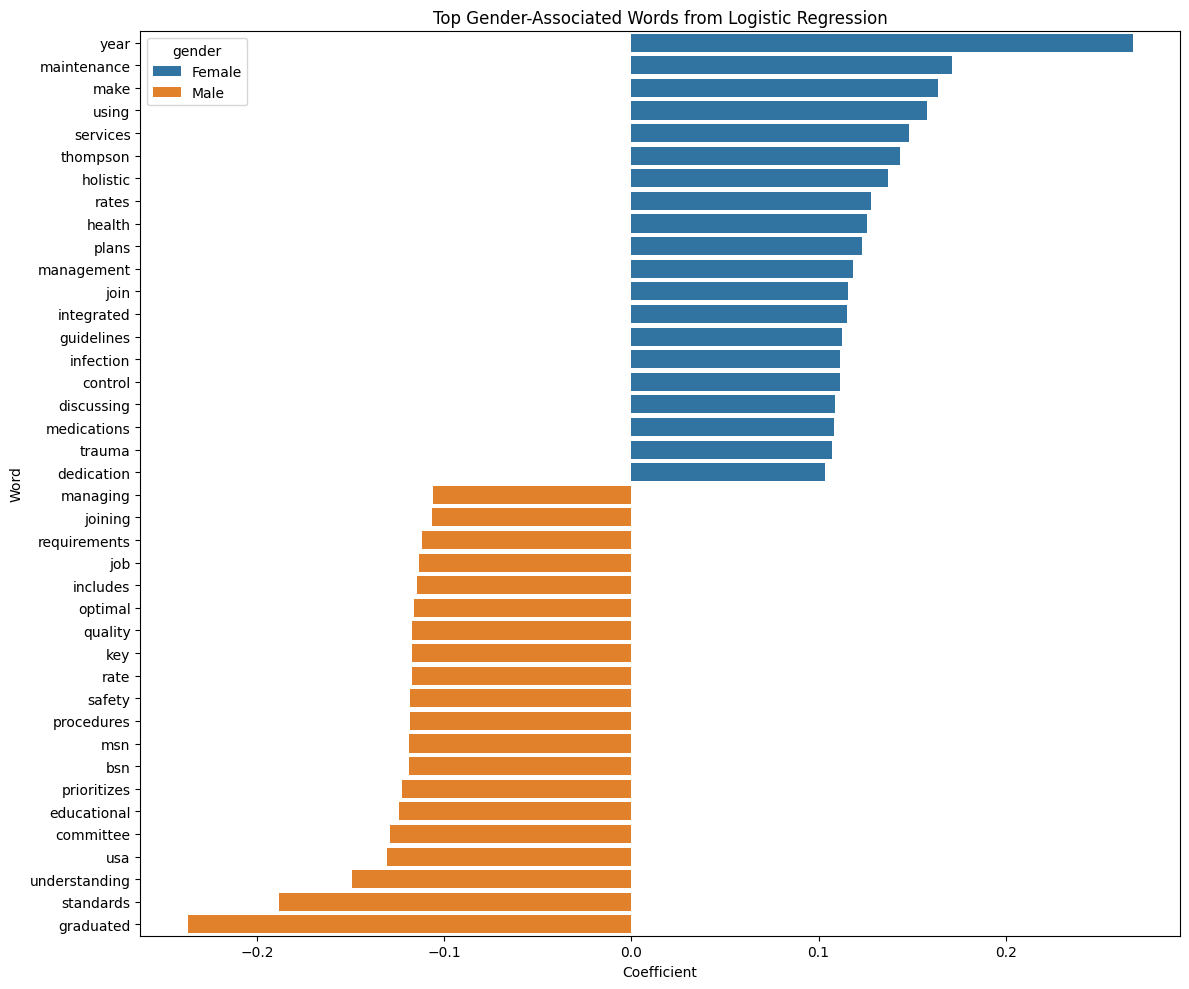

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

subset = pd.concat([
    top_female_words.assign(gender="Female"),
    top_male_words.assign(gender="Male")
])

plt.figure(figsize=(12, 10))
sns.barplot(
    data=subset,
    y="word",
    x="coefficient",
    hue="gender",
    dodge=False
)
plt.title("Top Gender-Associated Words from Logistic Regression")
plt.xlabel("Coefficient")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


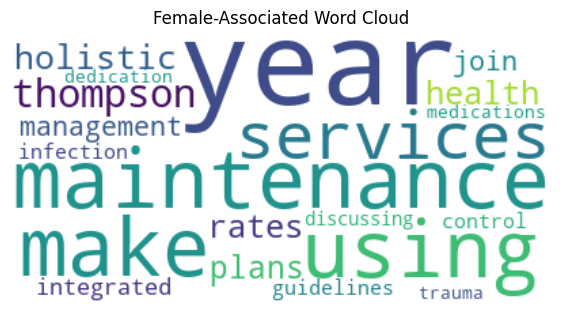

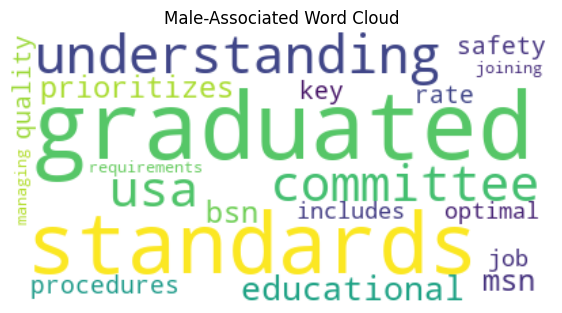

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

female_weights = {row.word: row.coefficient for _, row in top_female_words.iterrows()}
male_weights = {row.word: -row.coefficient for _, row in top_male_words.iterrows()}

# Female
plt.figure(figsize=(7,7))
wc = WordCloud(background_color="white").generate_from_frequencies(female_weights)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Female-Associated Word Cloud")
plt.show()

# Male
plt.figure(figsize=(7,7))
wc = WordCloud(background_color="white").generate_from_frequencies(male_weights)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Male-Associated Word Cloud")
plt.show()
